In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df1 = pd.read_csv('L2_Train.csv')
df2 = pd.read_csv('L2_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (87080, 8)
Shape of df2: (2255, 8)


In [ ]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,2,2024-01-17 15:28:05.000,0.00,1013.49,26.46,42.99,18575.83,61.29
1,2,2024-01-17 15:29:05.000,0.52,1013.47,26.33,43.78,18635.00,62.20
2,2,2024-01-17 15:36:05.000,0.35,1013.49,26.26,43.84,15628.33,42.12
3,2,2024-01-17 15:39:05.000,0.35,1013.48,26.12,46.14,14980.83,39.39
4,2,2024-01-17 15:40:05.000,1.48,1013.47,26.01,47.97,15128.33,40.54
...,...,...,...,...,...,...,...,...
89330,2,2024-09-26 14:56:07.000,0.00,1003.89,32.40,82.00,10137.50,33.87
89331,2,2024-09-26 14:57:07.000,0.00,1003.86,32.45,81.92,10353.33,35.35
89332,2,2024-09-26 14:58:07.000,0.00,1003.82,32.40,81.91,11352.50,42.50
89333,2,2024-09-26 14:59:07.000,0.00,1003.78,32.26,82.96,12168.33,49.56


In [6]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,89335.0,89335.000000,89335.000000,89335.000000,89335.000000,89335.000000,89335.000000
mean,2.0,0.759855,1009.270342,29.104003,65.412030,25664.685450,327.445189
std,0.0,1.045948,5.798765,9.046452,26.029925,29510.684434,539.835829
min,2.0,0.000000,996.300000,9.820000,13.410000,20.000000,0.000000
25%,2.0,0.000000,1004.630000,21.640000,41.865000,4127.085000,4.135000
50%,2.0,0.260000,1008.560000,28.160000,65.830000,13203.330000,43.430000
75%,2.0,1.310000,1013.730000,36.070000,91.790000,37804.580000,382.830000
max,2.0,8.360000,1024.280000,53.900000,100.000000,117758.200000,2488.720000


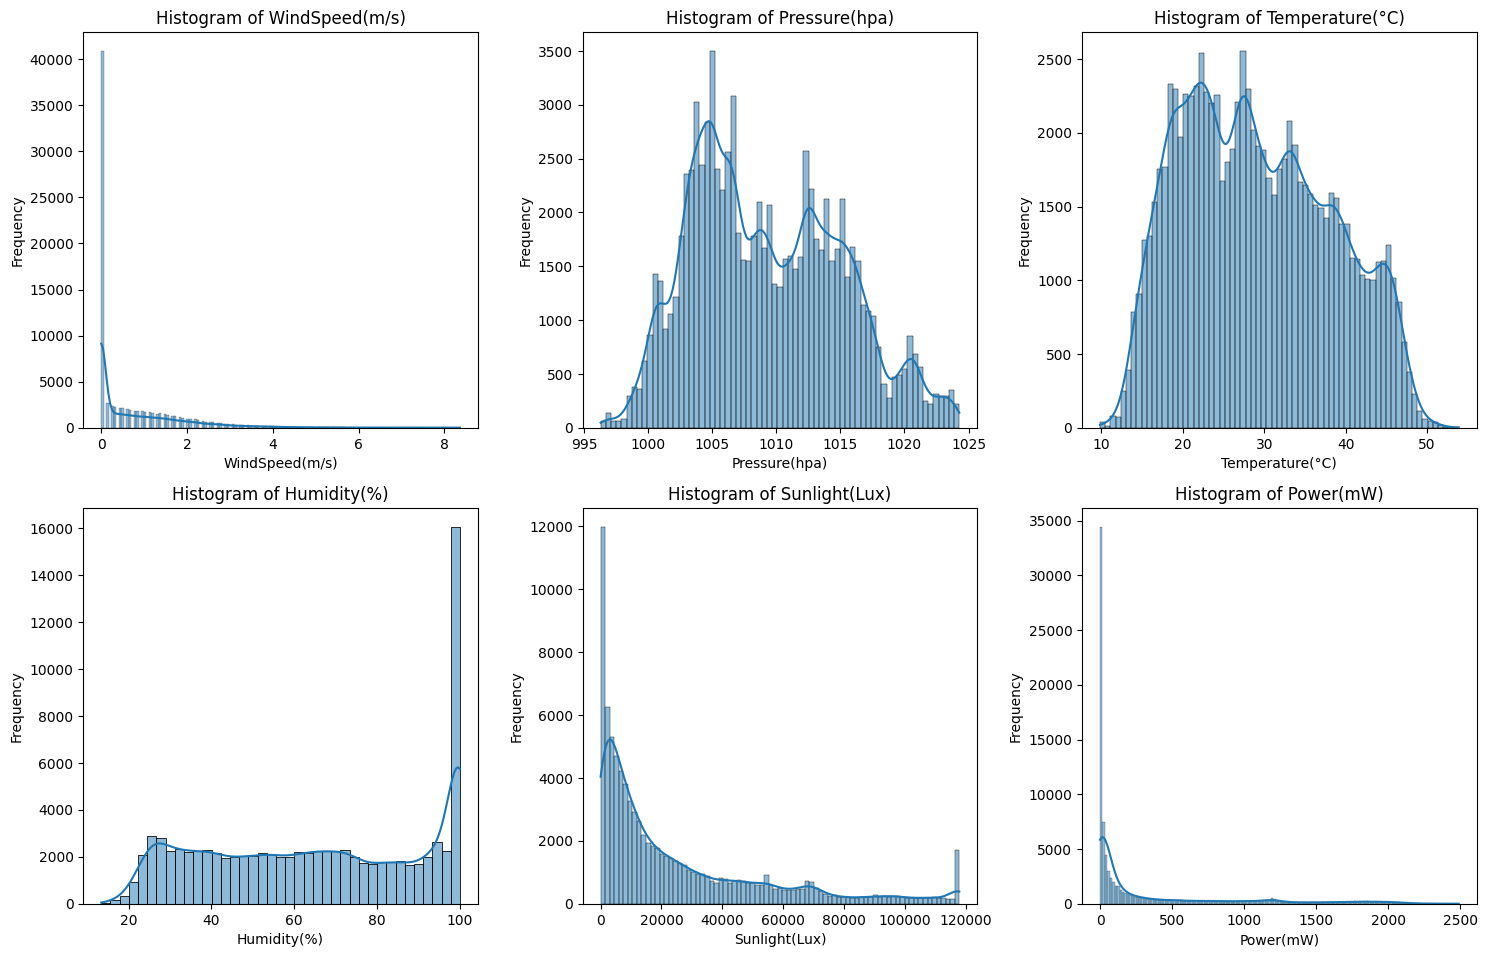

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
365,2,2024-01-18 10:20:02.000,2.35,1013.01,34.63,23.77,117758.2,2038.85
366,2,2024-01-18 10:21:02.000,1.48,1012.97,34.57,23.82,117758.2,2047.58
367,2,2024-01-18 10:22:02.000,0.78,1012.99,35.03,23.64,117758.2,2036.84
368,2,2024-01-18 10:23:02.000,0.87,1012.95,35.49,22.78,117758.2,2037.18
369,2,2024-01-18 10:24:02.000,1.05,1012.93,35.75,22.74,117758.2,2034.66
...,...,...,...,...,...,...,...,...
68733,2,2024-05-18 12:17:14.000,0.52,1003.68,42.90,30.14,117758.2,1742.90
68734,2,2024-05-18 12:18:14.000,1.48,1003.68,41.75,32.19,117758.2,1761.71
68735,2,2024-05-18 12:19:14.000,0.96,1003.61,41.98,31.76,117758.2,1820.64
68736,2,2024-05-18 12:20:14.000,0.26,1003.55,42.33,31.78,117758.2,1814.47


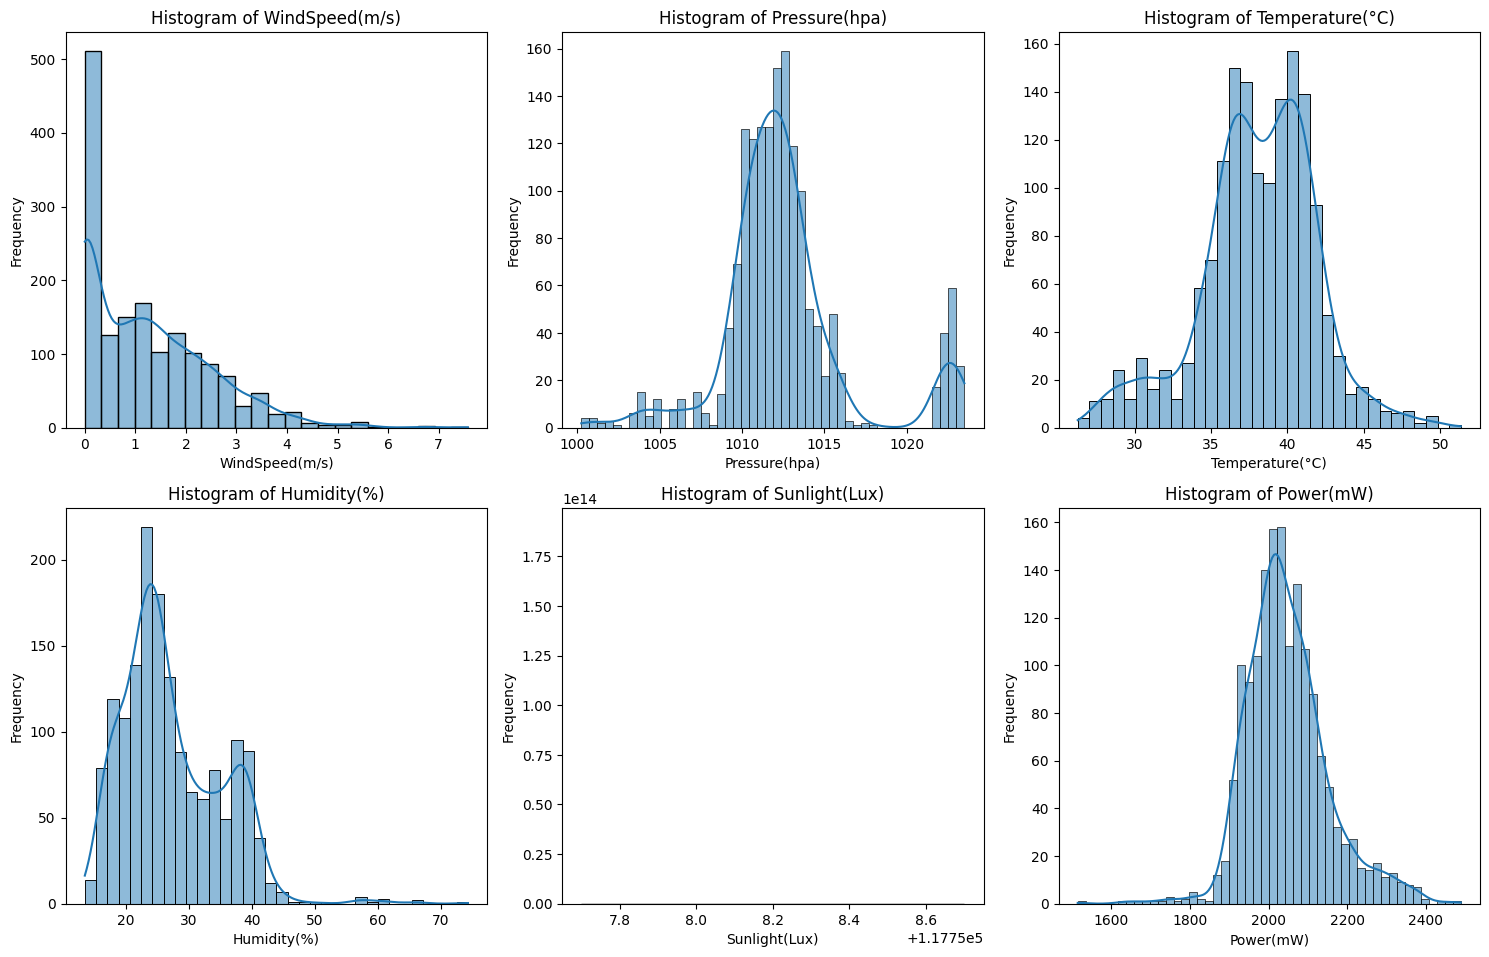

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0176 * Sunlight(Lux) + -126.6256


In [12]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0176
intercept = -126.6256

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [13]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,89335.0,89335.000000,89335.000000,89335.000000,89335.000000,89335.000000,89335.000000
mean,2.0,0.759855,1009.270342,29.104003,65.412030,25767.181030,327.445189
std,0.0,1.045948,5.798765,9.046452,26.029925,29849.133552,539.835829
min,2.0,0.000000,996.300000,9.820000,13.410000,20.000000,0.000000
25%,2.0,0.000000,1004.630000,21.640000,41.865000,4127.085000,4.135000
50%,2.0,0.260000,1008.560000,28.160000,65.830000,13203.330000,43.430000
75%,2.0,1.310000,1013.730000,36.070000,91.790000,37804.580000,382.830000
max,2.0,8.360000,1024.280000,53.900000,100.000000,148599.181818,2488.720000


In [14]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [15]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240117152802,0.67,1013.49,26.03,46.93,15410.92,42.60
1,20240117154602,0.98,1013.51,25.59,49.99,22329.83,78.13
2,20240117155602,1.08,1013.47,28.90,41.46,39966.16,142.50
3,20240117160602,0.59,1013.51,28.69,41.09,21333.33,32.98
4,20240117161602,0.45,1013.61,24.78,50.42,8598.67,9.72
...,...,...,...,...,...,...,...
8929,20240926141602,0.00,1003.85,31.99,85.49,12608.42,53.18
8930,20240926142602,0.00,1003.87,32.25,84.22,12533.33,52.90
8931,20240926143602,0.00,1003.92,32.92,80.56,12044.92,48.50
8932,20240926144602,0.00,1003.90,32.92,79.69,7825.17,21.45


# HEATMAP

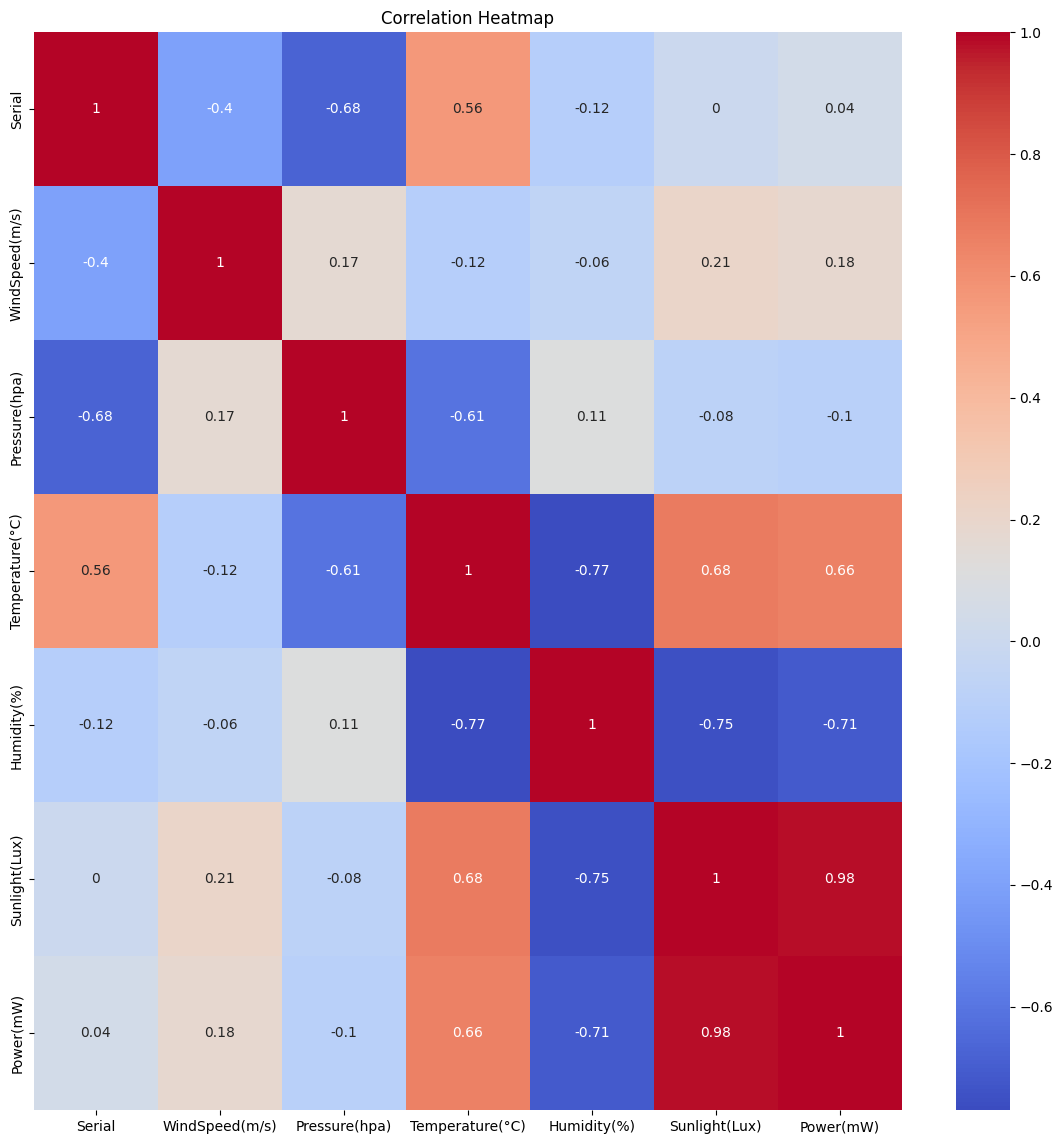

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.977925
Humidity(%)        0.713560
Temperature(°C)    0.662005
WindSpeed(m/s)     0.181634
Pressure(hpa)      0.103904
Serial             0.036143
Name: Power(mW), dtype: float64

In [18]:
df.to_csv('L2_Train_Revise.csv', index=False)